<a href="https://colab.research.google.com/github/subo-rodrigo/computer_vision_assig_249324H/blob/main/uom_assi_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

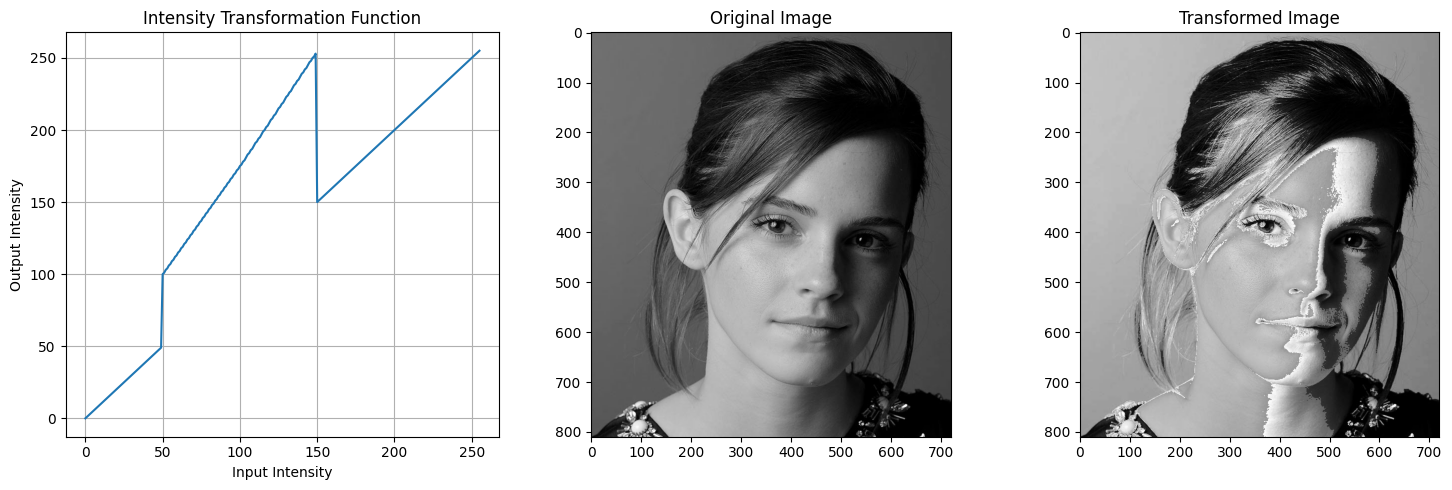

In [5]:
####1 Question
import cv2
import numpy as np
import matplotlib.pyplot as plt

def custom_intensity_transform(image):
    # Define transformation points
    input_points = np.array([0, 50, 50,100, 150, 150,200, 255])
    output_points = np.array([0, 50,100, 175, 255, 150,200, 255])
    lut = np.interp(np.arange(256), input_points, output_points).astype(np.uint8)

    transformed = cv2.LUT(image, lut)
    return transformed, lut


image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/uom_cv/a1images/emma.jpg', cv2.IMREAD_GRAYSCALE)
transformed_image, lut = custom_intensity_transform(image)


plt.figure(figsize=(15, 5))

# Intensity transformation graph
plt.subplot(131)
plt.plot(range(256), lut)
plt.title('Intensity Transformation Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)

# Original image
plt.subplot(132)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Transformed image
plt.subplot(133)
plt.imshow(transformed_image, cmap='gray')
plt.title('Transformed Image')

plt.tight_layout()
plt.show()

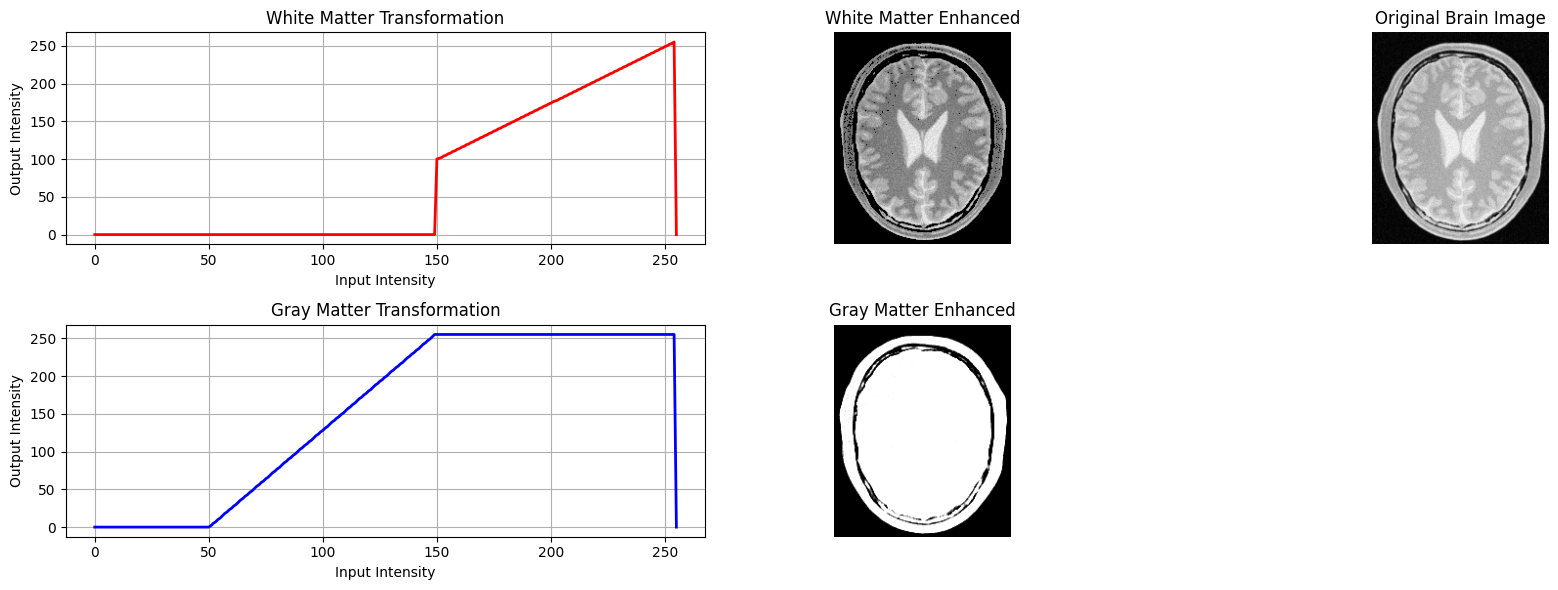

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def accentuate_white_matter(image):
    # enhance white matter
    lut = np.zeros(256, dtype=np.uint8)
    lut[150:255] = np.linspace(100, 255, 105).astype(np.uint8)
    return cv2.LUT(image, lut), lut

def accentuate_gray_matter(image):
    #enhance gray matter
    lut = np.zeros(256, dtype=np.uint8)
    lut[50:150] = np.linspace(0, 255, 100).astype(np.uint8)
    lut[150:255] = 255
    return cv2.LUT(image, lut), lut

brain_image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/uom_cv/a1images/brain_proton_density_slice.png', cv2.IMREAD_GRAYSCALE)

white_enhanced, white_lut = accentuate_white_matter(brain_image)
gray_enhanced, gray_lut = accentuate_gray_matter(brain_image)

plt.figure(figsize=(18, 6))

plt.subplot(2, 3, 1)
plt.plot(range(256), white_lut, 'r-', linewidth=2)
plt.title('White Matter Transformation')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)


plt.subplot(2, 3, 2)
plt.imshow(white_enhanced, cmap='gray')
plt.title('White Matter Enhanced')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.plot(range(256), gray_lut, 'b-', linewidth=2)
plt.title('Gray Matter Transformation')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)

plt.subplot(2, 3, 5)
plt.imshow(gray_enhanced, cmap='gray')
plt.title('Gray Matter Enhanced')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(brain_image, cmap='gray')
plt.title('Original Brain Image')
plt.axis('off')

plt.tight_layout()
plt.show()

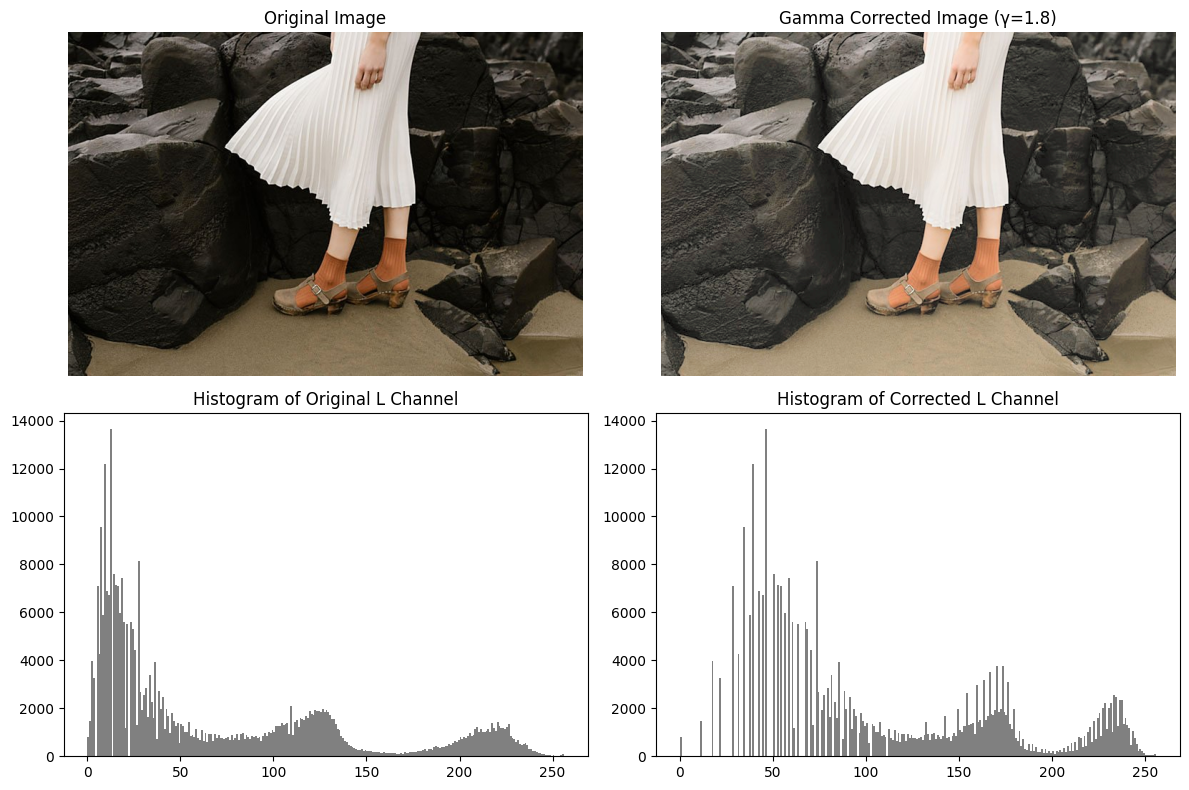

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/drive/MyDrive/Colab Notebooks/uom_cv/a1images/highlights_and_shadows.jpg"  # update path if needed
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
L, a, b = cv2.split(lab_image)

# Normalize L channel to [0,1]
L_norm = L / 255.0

# Apply gamma correction (gamma = 2.2)
gamma = 1.8
L_corrected = np.power(L_norm, 1/gamma)

# Scale back to [0,255]
L_corrected = np.uint8(L_corrected * 255)

# Merge corrected L with original a and b
lab_corrected = cv2.merge([L_corrected, a, b])
corrected_image = cv2.cvtColor(lab_corrected, cv2.COLOR_LAB2RGB)

# Plot original and corrected images with histograms
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

# Corrected image
plt.subplot(2, 2, 2)
plt.imshow(corrected_image)
plt.title(f"Gamma Corrected Image (γ={gamma})")
plt.axis("off")

# Histogram of original L
plt.subplot(2, 2, 3)
plt.hist(L.ravel(), bins=256, range=[0, 256], color='gray')
plt.title("Histogram of Original L Channel")

# Histogram of corrected L
plt.subplot(2, 2, 4)
plt.hist(L_corrected.ravel(), bins=256, range=[0, 256], color='gray')
plt.title("Histogram of Corrected L Channel")

plt.tight_layout()
plt.show()


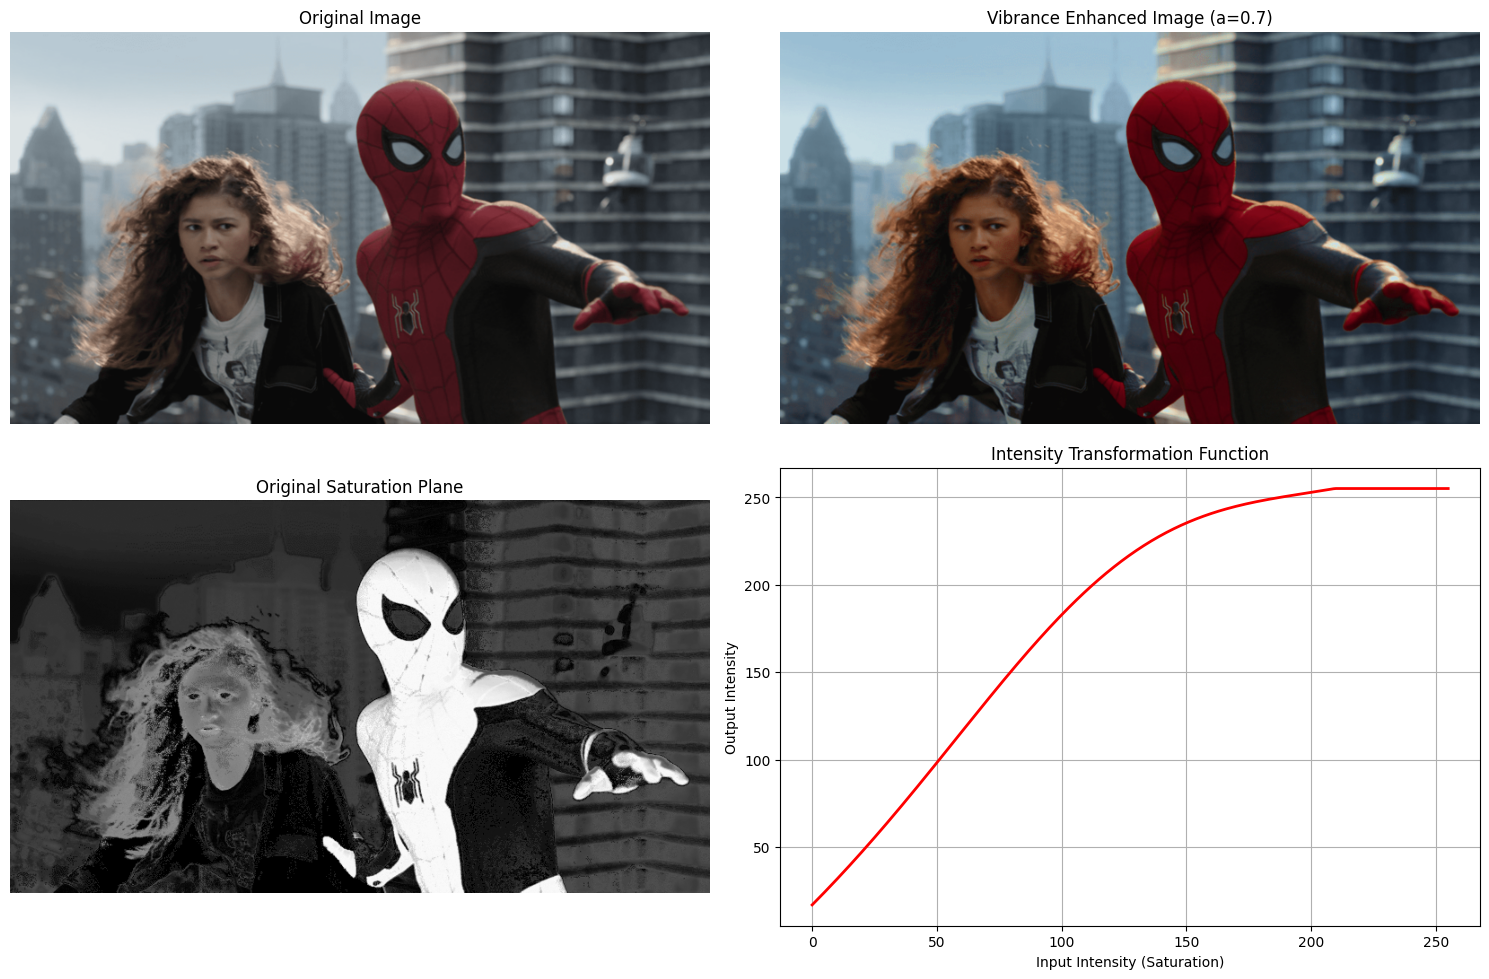

Chosen parameter a = 0.7


In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "/content/drive/MyDrive/Colab Notebooks/uom_cv/a1images/spider.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv)
sigma = 70
a = 0.7

# Apply intensity transformation
x = s.astype(np.float32)
gaussian_term = 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2))
s_transformed = np.minimum(x + a * gaussian_term, 255).astype(np.uint8)


hsv_enhanced = cv2.merge([h, s_transformed, v])
enhanced_image = cv2.cvtColor(hsv_enhanced, cv2.COLOR_HSV2RGB)


x_vals = np.arange(0, 256)
y_vals = np.minimum(x_vals + a * 128 * np.exp(-((x_vals - 128) ** 2) / (2 * sigma ** 2)), 255)

# Display results
plt.figure(figsize=(15, 10))


plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")


plt.subplot(2, 2, 2)
plt.imshow(enhanced_image)
plt.title(f"Vibrance Enhanced Image (a={a})")
plt.axis("off")


plt.subplot(2, 2, 3)
plt.imshow(s, cmap="gray")
plt.title("Original Saturation Plane")
plt.axis("off")


plt.subplot(2, 2, 4)
plt.plot(x_vals, y_vals, 'r', linewidth=2)
plt.title("Intensity Transformation Function")
plt.xlabel("Input Intensity (Saturation)")
plt.ylabel("Output Intensity")
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Chosen parameter a = {a}")